In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import tensorflow as tf
import keras
from keras.datasets import fashion_mnist

Using TensorFlow backend.


In [27]:
# Obtener los datos de fashion mnist y guárdalos en las variables correspondientes
(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()
# Imprime las dimensiones de los datos de entrenamiento
print('Datos de entrenamiento:', x_train.shape   )
print('Datos de prueba:', x_test.shape  )
print(y_train)

Datos de entrenamiento: (60000, 28, 28)
Datos de prueba: (10000, 28, 28)
[9 0 0 ... 3 0 5]


<img src="https://www.pyimagesearch.com/wp-content/uploads/2019/02/fashion_mnist_obtaining.jpg" alt="Drawing" style="width: 600px;"/>

In [29]:
prenda = ['T-shirt','Trouser','Pullover', 'Press','Coat','Sandal','Shirt','Sneaker','Ankle boot']

La imagen es: Press


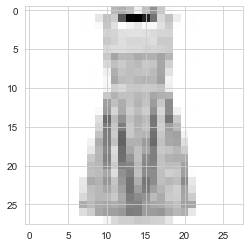

In [30]:
## Ver un ejemplo.
# Aquí estamos seleccionando una imagen al azar
sample = np.random.choice(x_train.shape[0])

print('La imagen es:', prenda[y_train[sample]])
sns.set_style('whitegrid')
plt.imshow(x_train[sample,:,:], cmap='Greys')
plt.show()

Para empezar, la red neuronal que hemos visto hasta ahora no acepta imágenes como datos de entrada. Para ello, tenemos que convertir las matrices que representan la imagen a vectores. Además, como queremos hacer una clasificación de más de dos categorías, hay que codificar las etiquetas con un one-hot-encoding.

Esto último lo podemos hacer con pandas, scikit learn o el mismo keras.

In [32]:
# Convierte a 3 dimensiones el tamaño de las imágenes
x_train  = x_train.reshape(x_train.shape[0], 28, 28, 1)
x_test   = x_test.reshape(x_test.shape[0], 28, 28, 1)

# Imprime el tamaño de las imágenes
print( x_test.shape )
print( x_train.shape )

(10000, 28, 28, 1)
(60000, 28, 28, 1)


In [37]:
# Guardar la forma de los datos de entrada
input_shape = (28, 28, 1)

In [33]:
# Vamos a cambiar los datos de entero a decimal para poder hacer la división
x_train = x_train.astype('float32')
x_test  = x_test.astype('float32')

# Cambia la escala de los datos de entrada de 0-255 a 0-1
x_train = x_train/255
x_test  = x_test/255

In [34]:
# Cambiamos a one.hot encoding las variables de etiqueta. ¿Cuántas categorías diferentes hay para clasificar las imágenes?
num_classes = 10

# Utiliza la variable anterior para codificar los datos de etiqueta
y_train = keras.utils.to_categorical( y_train , num_classes )
y_test  = keras.utils.to_categorical( y_test , num_classes )

In [47]:
# Importamos las funciones necesarias de Keras.
# Una capa de convolución usamos Conv2D
# Una capa de pooling (con la operación max) la usamos como MaxPooling2D
# Para convertir el resultado de la convolución y pooling a un vector, usamos Flatten

from keras.models import Sequential
from keras.layers import Dense, Conv2D, Flatten, MaxPooling2D

# Creamos un modelo secuencial como en el ejemplo anterior
redConv = Sequential()

# Agregamos una capa de 32 filtros de 3x3 con función de activación ReLu
redConv.add( Conv2D(32, (3, 3), activation='relu', input_shape = input_shape, padding = 'same'   ))

# Agregamos una capa de pooling de 2x2
redConv.add(MaxPooling2D((2, 2)) )

## Para convertir la capa anterior a un vector, usamos flatten
redConv.add(Flatten()  )

## Agregamos una capa de 100 nodos con activación relu
redConv.add(Dense(100, activation= 'relu' )    )

## Como queremos clasificar en muchas categorías, ¿cuál función de activación utilizamos?
## El tipo de capa es Dense como en una red normal.
redConv.add(Dense(10, activation= 'softmax' ))

## Mostrar el resumen 
redConv.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_2 (Conv2D)            (None, 28, 28, 32)        320       
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 14, 14, 32)        0         
_________________________________________________________________
flatten_2 (Flatten)          (None, 6272)              0         
_________________________________________________________________
dense_3 (Dense)              (None, 100)               627300    
_________________________________________________________________
dense_4 (Dense)              (None, 10)                1010      
Total params: 628,630
Trainable params: 628,630
Non-trainable params: 0
_________________________________________________________________


In [48]:
## Entrenamos el modelo con un optimizador sgd. Ahora vamos a personalizar el optimizador
optimizador = keras.optimizers.SGD(lr=0.01, momentum=0.9)

# Utiliza el optimizador anterior para compilar el modelo
redConv.compile(loss=  'categorical_crossentropy', optimizer=optimizador, metrics=['accuracy'])

In [49]:
# Corre el modelo con .fit con lotes de 32 y 10 epocas
history = redConv.fit(x_train, y_train, batch_size= 32 , epochs= 10 , validation_split=0.1, verbose=True)

Train on 54000 samples, validate on 6000 samples
Epoch 1/10
54000/54000 [==============================] - 21s 398us/step - loss: 0.4812 - acc: 0.8274 - val_loss: 0.3316 - val_acc: 0.8758
Epoch 2/10
54000/54000 [==============================] - 21s 395us/step - loss: 0.3153 - acc: 0.8848 - val_loss: 0.3078 - val_acc: 0.8887
Epoch 3/10
54000/54000 [==============================] - 21s 394us/step - loss: 0.2688 - acc: 0.9015 - val_loss: 0.2837 - val_acc: 0.8978
Epoch 4/10
54000/54000 [==============================] - 21s 392us/step - loss: 0.2389 - acc: 0.9117 - val_loss: 0.2853 - val_acc: 0.9023
Epoch 5/10
54000/54000 [==============================] - 21s 398us/step - loss: 0.2154 - acc: 0.9216 - val_loss: 0.2590 - val_acc: 0.9047
Epoch 6/10
54000/54000 [==============================] - 24s 443us/step - loss: 0.1946 - acc: 0.9285 - val_loss: 0.2571 - val_acc: 0.9050
Epoch 7/10
54000/54000 [==============================] - 22s 406us/step - loss: 0.1774 - acc: 0.9338 - val_loss: 0.2

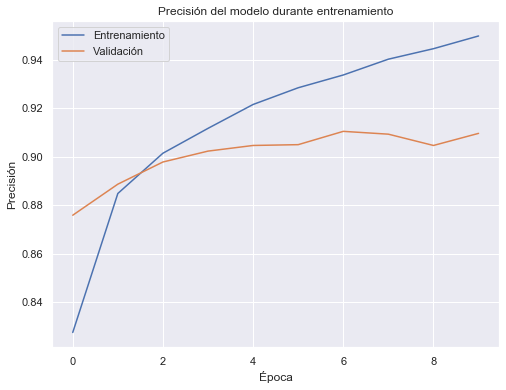

Precisión en datos de prueba: 0.906


In [50]:
# Utiliza la función evalate para ver el error y la precisión del modelo entrenado
loss, accuracy  = redConv.evaluate(x_test, y_test, verbose=False)

# Graficar resultados
sns.set()
plt.figure(figsize=(8,6))
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('Precisión del modelo durante entrenamiento')
plt.ylabel('Precisión')
plt.xlabel('Época')
plt.legend(['Entrenamiento', 'Validación'], loc='best')
plt.show()

print(f'Precisión en datos de prueba: {accuracy:.3}')

La imagen predicha es: Pullover 

El imagen real es: Pullover


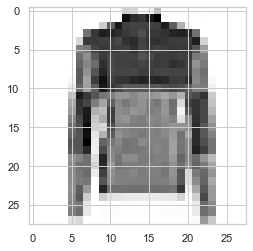

In [58]:
index   = np.random.choice(x_test.shape[0])
x_index = x_test[index,:].reshape(1,28,28,1)
prediccion = np.squeeze(redConv.predict(x_index))

# El vector de predicción contiene los valores de las probabilidades de que sea uno de los dígitos de (0,1,2,...,8,9) en ese
# orden. Para encontrar el valor predicho hay que buscar la POSICIÓN con el valor más alto.
max_index = np.squeeze(np.where(prediccion==prediccion.max()))
y_index   = np.squeeze(np.where(y_test[index,:]==1))

# Mostrar el resultado
print('La imagen predicha es:', prenda[max_index], '\n')
print('El imagen real es:', prenda[y_index])

sns.set_style('whitegrid')
plt.imshow(np.reshape(x_test[index,:],(28,28)), cmap='Greys')
plt.show()

In [54]:
# Hay una opción en las capas de convolución que se llama 'padding'.
# Esta opción rellena la imagen de tal manera que el resultado después de aplicar el filtro tiene el mismo tamaño que
# la imagen original.

# Utiliza la opción padding='same' para ver cómo mejora o empeora el modelo.